# Final Project Template

For the final project for this module, you are asked to use ETL together with the skills you have learned about Python and MySQL in the previous modules to understand spending patterns.

This module's project is divided into two main parts: Extract-Transform-Load (ETL) and Analysis and Visualization.

Your challenge in this project is to implement the steps suggested by Dr. Sanchez in his videos throughout the module and prove that you have a a clear understanding of each of them by being able to describe and justify them. You will also be tested on your ability to conduct your own analysis to understand spending patterns.

Before you fill out the project outline template below, make sure you:

- Read through the template completely to understand the instructions for the structure of the project.
- Have a clear understanding of what to do to create a model that will return the results you want to find.
- Use Markdown to edit the template.
- Include any screenshots of your code (both Python and MySQL) and of your program windows (Excel, Terminal, VS Code, MySQL Workbench) to demonstrate your steps.

# Monthly Retail Trade Survey Analysis Project

**Ken Walsh**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and the results of your model. Complete this portion of the template after you are done working on your project.

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to create your ETL, Analysis, and Visualization project. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

[Back to top](#Index)

## 2. Extract-Transform-Load



[Back to top](#Index)

### 2.1 The ETL Process

Extract, Transform, Load (ETL) is a systematic process of gathering data from multiple sources, reshaping it into a structured format, and subsequently storing it in a targeted data repository. In this project, we're tasked with processing numerical data sourced from a U.S. government agency's provided in the form of an Excel Workbook. This data undergoes formatting transformations and is exported to an intermediary CSV (comma-separated values) file, before finally being integrated into a MySQL database using Python. The following outlines the steps undertaken for each phase of the ETL process.

### Extract

**Data Formatting in Excel:** Redundant data was removed from each of the worksheets in the Excel workbook using an Excel macro. Some data manipulation was carried out, only the "Not Adjusted" data was retained. Any data aggregation rows or columns were removed, as this aggregation can be achieved within the database.

**Exporting the Data:** A python script ("Export_CSVs - xlrd.py") was used to loop through the workbook and export each worksheet as a CSV file. The filename corresponded to the year of the data.

### Transform

**Data Cleaning:** A function, *sanitize_value*, cleanses the data of any non-numerical data contained within the CSVs in numerical columns.

**Data Structuring:** The database design addresses the issue of multiple NAIC Codes being associated with a single business type.

### Load

**Database Creation** The python script uses *yaml* for database connectivity and creates the *mrts* database in the MySQL Server if it does not already exist. It then creates the two tables used in the database, (*NAIC_Codes*, *Monthly_Data*).

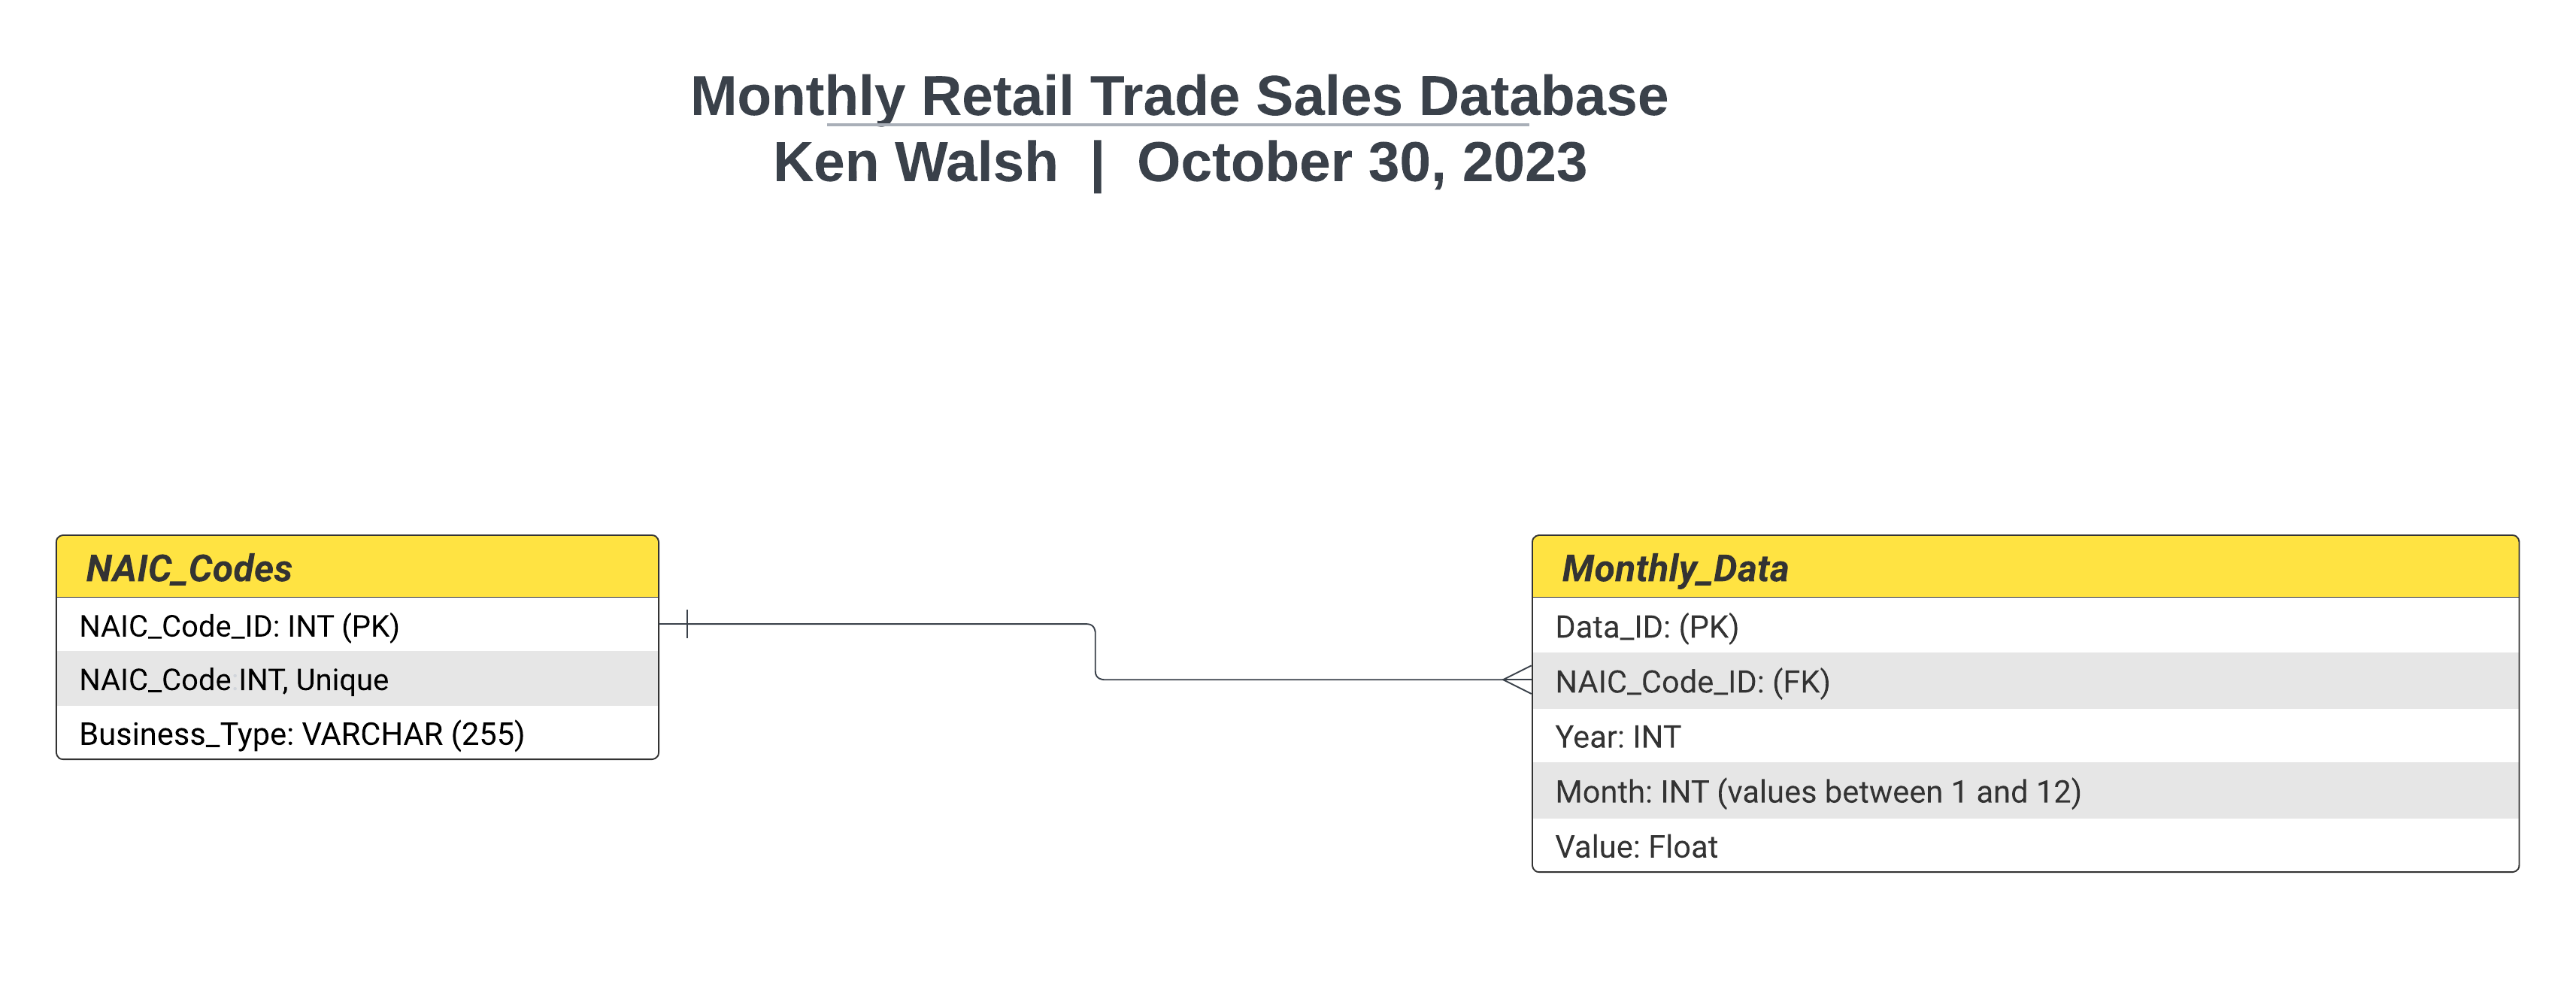

**Data Insertion** The data from the CSV files is then injected into these tables with some data validation, and as each CSV file is processed a confirmation is printed. Upon completion, all changes are committed and the connections are closed.

In summary, the ETL process for the MRTS dataset involves extracting data from CSV files, transforming it by cleaning and restructuring to fit the database schema, and then loading it into the MySQL database, ensuring relationships and integrity are maintained.

[Back to top](#Index)

### 2.2 Data Exploration

**MRTS:** The MRTS (Monthly Retail Trade Survey) data is collected and published by the U.S. Census Bureau. This survey provides national estimates on monthly sales, end-of-month inventories, and other selected monthly sales estimates for retail businesses and food service establishments. [1]

**Objective:** The main goal of the MRTS is to provide a current measure of the health of the U.S. economy through key indicators, such as retail sales and inventories.

**Coverage:** It covers a variety of retail firms, including food services, drinking places, gasoline stations, and other types of general merchandise stores.

**Data**:
* **Sales Data:** Represents the total sales of establishments to the end-users. This doesn't include any inter-company sales or sales to other businesses.
* **Periodicity:** The data is collected monthly.

**Uses:** The collected data is used by government agencies, business firms, research organizations, and academia to study economic trends, forecast future demands, and make informed decisions.

**Data Provided:** The data for the project was provided in an excel workbook with twenty-eight worksheets. Each worksheets corresponded to a year of data, starting in 1992 through 2021. The data for 2021 was only a partial year, containing the first two months. There were two classifications of data, *Not-Adjusted* and *Adjusted* data.The *Adjusted* data has had seasonal fluctuations applied to it. Some of the numerical data had **(S)** in the cell, instead of numerical data, this relates to suppressed data for various reasons.


[Back to top](#Index)

### 2.3 Data Preparation

### Potential Issues with the MRTS Data

* There are two distinct sections: *Not Adjusted* and *Adjusted* sets of data. The *Not Adjusted* set was chosen for the project. So, the *Adjusted* data was removed.

* There are several rows that have NULL values for the NAICS code, these are aggregations of several businesses. These aggregations can be reproduced in the database, once the NAIC codes for each aggregation are known. This will be determined from the U.S. Census Bureau website.

* There are three rows with multiple NAICS codes for a single business type. Two of these rows with NAIC Codes entries (4411, 4412) and (442, 423) are aggregations of other rows and so were removed, as they could be replicated in the database if required. The other row containing (722513, 722514, 722515) as the entry was changed to use just (722513) as the NAIC Code. After consulting the U.S. Census Bureau information on this code, the decision was made that it was safe to make this change. This simplifies the database design considerably.

* Some rows and cells must be deleted to format the worksheets for easy exporting into CSVs, the Excel Macro will accomplish this step.

* Numerical columns with *(S)*, *(NA)*, or *NaNs* in them, will be replaced with zero using a function in the python installation script.

* Aggregation columns *CY CUM*, *PY CUM* from 2021, and all *Total* columns were removed as they are aggregations, and this can be accomplished within the database.

### Excel Macros

Several very simple excel macros were written/recorded to carry out the data manipulations to get the data into best format for export to CSVs.

**ProcessWorksheeets()** 

This macro completes the following tasks to transform the worksheet into a format for exporting to CSV and importation to MySQL:

* Deletes the top three rows of each worksheet. The requirement is to get a row of data headers for easier importation into the database. It loops through the workbook carrying out the deletions on each worksheet.

* Addresses the NAICS Code and Business cells being in the wrong place for the headers row. The macro copies them from Row 1 to Row 2 and then deletes Row 1 to create my header row. It does this for every worksheet.

* Deletes row 1 from the worksheet which is now an empty row. Thus, row 1 now has the header information we require.

* Deletes from the new row 2 to row 9 from the worksheet. Row 2 contains one entry "Not Adjusted", this entry is not required. The subsequent rows to row 9 (inclusive) are aggregate rows and are dealt with in the database.

* Deletes two rows where there are double NAIC codes in the NAIC codes cell for each row. These again are aggregation rows and can be replicated in the database. It deletes the new row 8 and row 3. 

* Resolves the issue with three NAIC codes for a single business type by removing two of the codes.

* Removes Column P from the worksheets, as in some of the worksheets this column contains spurious data.

* This step reduces the amount of data being uploaded to the database, it was decided to remove data aggregations as they can be generated within the database. So, the *CY Cum*, *PY Cum*, and *Total* columns, reproducable within the database, were removed. The macro locates the row indicating where the *Adjusted* data starts (this data is to be removed) and deletes it and all subsequent rows until it meets an the double empty row, when it terminates.

```
Sub ProcessWorksheets()
    Dim ws As Worksheet
    Dim lastRow As Long
    Dim rng As Range
    Dim rng1 As Range
    Dim colName As Variant
    Dim deleteFlag As Boolean
    Dim previousRowWasEmpty As Boolean
    
    ' Array of column names to search for deletion
    colName = Array("Total", "CY CUM", "PY CUM")

    ' Loop through each worksheet in the workbook
    For Each ws In ThisWorkbook.Worksheets

       ' Task 1: Deletes the first three rows
        ws.Rows("1:3").Delete Shift:=xlUp

       ' Task 2: Getting a row of header columns.
        ' Copy A1 and B1 to A2 and B2
        ws.Range("A1:B1").Copy Destination:=ws.Range("A2:B2")
        
       ' Task 3: Delete the empty row at the top of the worksheets
       ws.Rows(1).Delete Shift:=xlUp

       ' Task 4: Delete rows 2 through 9 on the active worksheet
       Set rng1 = ws.Rows("2:9")
       rng1.Delete Shift:=xlUp

       ' Task 5: Removes rows 3 and 8 - these are aggregate rows and are not required
       ' Delete row 8 first because deleting row 2 first would shift the rows up
       ws.Rows(8).Delete
       ' Now delete row 3
       ws.Rows(3).Delete

       ' Task 6: Resolve the issue with multiple NAICs for one business type in cell A57
       ws.Range("A57").Value = 722513
       
       ' Task 7: Delete Column P for spurious data
       ws.Columns("P").Delete

       ' Task 8: Delete unnecessary columns
        deleteFlag = False ' This flag will be set to true once "ADJUSTED(2)" is found
        previousRowWasEmpty = False ' This flag will be used to identify consecutive empty rows
        lastRow = ws.Cells(ws.Rows.Count, "B").End(xlUp).Row ' Find the last row with data in column B
        
        ' Task 8a: Delete columns with specified names
        For Each col In colName
            ' Search for the column name in the first row
            Set rng = ws.Rows(1).Find(What:=col, LookIn:=xlValues, LookAt:=xlWhole)
            ' If found, delete the entire column
            If Not rng Is Nothing Then rng.EntireColumn.Delete
        Next col
        
        ' Task 8b: Delete rows starting from "ADJUSTED(2)" until first double empty row
        ' Initialize index for the loop
        Dim i As Long
        For i = 1 To lastRow
            ' Check if the current cell in column B is "ADJUSTED(2)"
            If ws.Cells(i, 2).Value = "ADJUSTED(2)" Then
                deleteFlag = True ' Set the delete flag once "ADJUSTED(2)" is found
            End If
            
            ' When deleteFlag is True, start deleting rows
            If deleteFlag Then
                ' Check if current row is empty
                If IsEmpty(ws.Cells(i, 1)) And IsEmpty(ws.Cells(i, 2)) Then
                    ' If previous row was also empty, we've found two consecutive empty rows
                    If previousRowWasEmpty Then Exit For ' Exit the loop if two consecutive empty rows are found
                    previousRowWasEmpty = True ' Set the flag if the current row is empty
                Else
                    ' If current row is not empty, reset the flag
                    previousRowWasEmpty = False
                End If
                
                ' Delete the current row and decrement the counter to adjust for the shift in rows
                ws.Rows(i).Delete
                i = i - 1
                lastRow = lastRow - 1 ' Adjust lastRow count since we've deleted a row
            End If
        Next i
    Next ws
End Sub
```

In summary, this macro prepares the data for export to the CSV format for importation into the database.

### Creating the CSVs

To create the CSVs, a python script was written, as each worksheet in the Excel workbook must be exported separately. Each CSV that is generated is given a name corresponding to the year the data comes from. For this script, the *xlrd* python library was used for manipulating the excel workbook.

```
import os
import csv
import xlrd
import easygui

# Prompt the user to select the Excel workbook using easygui
excel_file = easygui.fileopenbox(title="Select an Excel workbook", filetypes=['*.xls', '*.xlsx'])

# Check if a file was selected
if not excel_file:
    print("No Excel file was selected. Exiting...")
    exit()

# Load the Excel workbook
workbook = xlrd.open_workbook(excel_file)

# Ensure the "CSVs" folder exists in the same directory as the Excel file
csv_folder = os.path.join(os.path.dirname(excel_file), "CSVs")
if not os.path.exists(csv_folder):
    os.mkdir(csv_folder)

# Iterate over each worksheet and export to CSV
for sheet_name in workbook.sheet_names():
    sheet = workbook.sheet_by_name(sheet_name)
    csv_filename = os.path.join(csv_folder, sheet_name + ".csv")

    with open(csv_filename, 'w', newline="", encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        for row_num in range(sheet.nrows):
            writer.writerow(sheet.row_values(row_num))

print(f"All worksheets from '{excel_file}' have been exported to the 'CSVs' folder.")
```

[Back to top](#Index)

### 2.4 Read the Data Using Python

Python offers many methods for reading and handling CSV (Comma-Separated Values) files. The code uses *pandas*, *os* and *easygui* to create a gui for user input to select the *yaml* file, and then the folder containing the CSVs to import as part of the installation script.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

The headers and first six rows of data from the 2020 MRTS worksheet was used to create a csv file called test. An image of the test.csv file is displayed below.

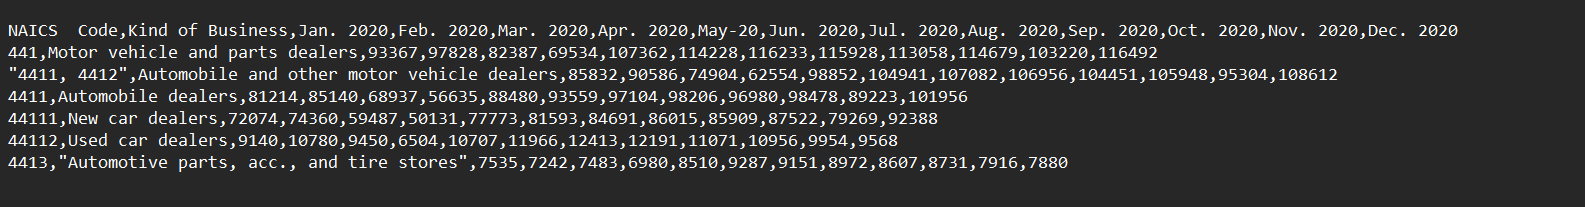

The decision to use actual data permitted use of the code in the final installation script.

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

```
import easygui
import pandas as pd
import os

# Prompt user to select a directory
folder_path = easygui.diropenbox(title="Select a folder containing CSV files")

if folder_path:
    # Get list of all CSV files in the selected directory
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Check if there are any CSV files in the directory
    if csv_files:
        for csv_file in csv_files:
            full_path = os.path.join(folder_path, csv_file)
            df = pd.read_csv(full_path)
            print(f"Contents of {csv_file}:\n")
            print(df.head(6))  # Print first 6 rows of the dataframe
            print("\n" + "-"*50 + "\n")  # Add a separator for clarity
    else:
        print("No CSV files found in the selected directory!")
else:
    print("No folder was selected!")
```

**User Interface with easygui:**
Prompts the user to select a directory with an interactive GUI experience without the need to input directory paths manually or hardcode them.

**Directory Handling with os:**
The os module is used to interact with the operating system. Here, you've used it to list all files in the chosen directory and filter out CSV files.

**Data Reading with pandas:**
The pandas library is used to read the CSV files. The read_csv() function converts the content of a CSV file into a dataframe.

**Displaying the Data:**
Once the data is loaded into a dataframe, the first six rows of each file is printed to the console. This gives a quick glance at the content to the user.

**Error Handling and Feedback:**
The code provides feedback if no CSV files are found or if the user doesn't select a directory.

[Back to top](#Index)

### 2.5 Writing an Installation Script

```
import mysql.connector
import easygui
import pandas as pd
import os
import yaml

# Prompt user to select the .yaml configuration file
config_path = easygui.fileopenbox(title="Select your database configuration file", filetypes=['*.yaml'])

# Load MySQL configuration from the selected yaml file
with open(config_path, 'r') as f:
    db = yaml.safe_load(f)

# Extracting connection details from the configuration file
config = {
    'user':     db['user'],
    'password': db['pwrd'],
    'host':     db['host'],
    'auth_plugin': 'mysql_native_password'
}

# Connect to MySQL to check if the database exists
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Create the 'mrts' database if it doesn't exist
cursor.execute("CREATE DATABASE IF NOT EXISTS mrts")

# Close the initial connection
cursor.close()
cnx.close()

# Specify the 'mrts' database for subsequent connections
config['database'] = 'mrts'
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Create necessary tables if they don't exist
# Create NAIC_Codes table
cursor.execute("""
CREATE TABLE IF NOT EXISTS NAIC_Codes (
    NAIC_Code_ID INT AUTO_INCREMENT PRIMARY KEY,
    NAIC_Code INT UNIQUE,
    Business_Type VARCHAR(255)
)
""")

# Create Monthly_Data table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Monthly_Data (
    Data_ID INT AUTO_INCREMENT PRIMARY KEY,
    NAIC_Code_ID INT,
    Year INT,
    Month INT CHECK (Month BETWEEN 1 AND 12),
    Value DECIMAL(10,2),
    FOREIGN KEY (NAIC_Code_ID) REFERENCES NAIC_Codes(NAIC_Code_ID)
)
""")

# Prompt user to select directory containing CSV files
folder_path = easygui.diropenbox(title="Select a folder containing CSV files")

# Helper functions for database interactions
def get_naic_code_id(cursor, code):
    cursor.execute("SELECT NAIC_Code_ID FROM NAIC_Codes WHERE NAIC_Code = %s", (code,))
    result = cursor.fetchone()
    return result[0] if result else None

def insert_naic_code_and_type(cursor, code, business_type):
    if pd.isna(code) or code == 'nan':
        return None
    cursor.execute("INSERT INTO NAIC_Codes (NAIC_Code, Business_Type) VALUES (%s, %s) ON DUPLICATE KEY UPDATE NAIC_Code = VALUES(NAIC_Code), Business_Type = VALUES(Business_Type)", (code, business_type))
    return get_naic_code_id(cursor, code)

def sanitize_value(value):
    if value in ['(NA)', '(S)'] or pd.isna(value):
        return '0'
    return value

# Check if a folder path was selected
if folder_path:
    # Extract all CSV files from the selected directory
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        full_path = os.path.join(folder_path, csv_file)

        # Extract year from the filename
        try:
            year = int(csv_file.split('_')[-1].replace('.csv', ''))
        except ValueError:
            print(f"Skipped {csv_file} due to unexpected file naming format.")
            continue

        data = pd.read_csv(full_path)

        # Populate the database using CSV data
        for index, row in data.iterrows():
            naic_code = row[0]
            business_type = row[1]
            naic_code_id = insert_naic_code_and_type(cursor, naic_code, business_type)

            for month, value in enumerate(row[2:], 1):
                cursor.execute("INSERT INTO Monthly_Data (NAIC_Code_ID, Year, Month, Value) VALUES (%s, %s, %s, %s)", (naic_code_id, year, month, sanitize_value(value)))

            print(f"Inserted data from {csv_file}")

# Commit changes and close connection
cnx.commit()
cursor.close()
cnx.close()

print("Database and tables have been created and populated successfully!")
```

This is the installation python code for creating and populating the MRTS database for this project. The following is a breakdown of the different sections and a brief description of each.

**Importing necessary modules:**

1. **mysql.connector:** For connecting to and working with a MySQL database.
2. **easygui:** Provides easy-to-use GUI dialogs.
3. **pandas:** Data analysis library, mainly used here for handling CSV files.
4. **os:** Allows interaction with the operating system (e.g., listing files).
5. **yaml:** Used for reading YAML configuration files.

**Selecting the configuration file:**

The user is prompted to select a .yaml file which contains the configuration for connecting to the MySQL database.

**Loading database configuration:**

The selected YAML file is read and the database connection details are extracted.

**Connecting to MySQL:**

The script connects to MySQL using the loaded configuration to check if the desired database (mrts) exists. If it doesn't exist, it's created.

**Defining the database structure:**

The script reconnects, this time specifying the 'mrts' database. Two tables (NAIC_Codes, and Monthly_Data) are defined and created if they don't exist already.

**Selecting the data source:**

The user is prompted to select a folder containing CSV files which will be used to populate the database.

**Helper functions for database interactions:**

Several helper functions are defined to aid in inserting and retrieving data from the database. This includes get_naic_code_id,  insert_naic_code, and sanitize_value.

**Reading and inserting data from the CSV files:**

* The script lists all CSV files in the chosen directory.
* For each CSV file:
* The year is extracted from the filename.
* The CSV file is loaded into a pandas DataFrame.
* Each row of the DataFrame is processed to extract the NAIC code, business type, and monthly data.
* The NAIC code and business type are inserted into the *NAIC_Codes* table.
* The monthly data is inserted into the *Monthly_Data* table.

**Closing the connection:**

After processing all CSV files, the database connection is committed to save changes and then closed.

**Final message:**

A message is printed indicating that the database and tables have been successfully created and populated.



### Data Validation

```
import mysql.connector
import easygui
import yaml

# Prompt user to select the .yaml configuration file
config_path = easygui.fileopenbox(title="Select your database configuration file", filetypes=['*.yaml'])

# Load MySQL configuration from the selected yaml file
with open(config_path, 'r') as f:
    db = yaml.safe_load(f)

# Extracting connection details from the configuration file
config = {
    'user':     db['user'],
    'password': db['pwrd'],
    'host':     db['host'],
    'database': 'mrts',
    'auth_plugin': 'mysql_native_password'
}

# Connecting to the 'mrts' database
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Validation 1: Count of NAIC Codes
cursor.execute("SELECT COUNT(*) FROM NAIC_Codes")
naic_count = cursor.fetchone()[0]
print(f"Count of NAIC Codes: {naic_count}")
print(f"Count of NAIC Codes in Excel Workbook: 56")

# Validation 2: Monthly Data without Corresponding NAIC Code
cursor.execute("""
SELECT COUNT(*)
FROM Monthly_Data
WHERE NAIC_Code_ID NOT IN (SELECT NAIC_Code_ID FROM NAIC_Codes)
""")
orphan_data_count = cursor.fetchone()[0]
print(f"\nData entries without a corresponding NAIC Code: {orphan_data_count}")

# Validation 3: Monthly Data Range
cursor.execute("""
SELECT COUNT(*)
FROM Monthly_Data
WHERE month NOT BETWEEN 1 AND 12
""")
invalid_month_count = cursor.fetchone()[0]
print(f"\nData entries with an invalid month value: {invalid_month_count}")

# Validation 4: Check for Missing Data in the Monthly_Data Table
cursor.execute("""
SELECT Data_ID, NAIC_Code_ID, year, month, value
FROM Monthly_Data
WHERE NAIC_Code_ID IS NULL OR year IS NULL OR month IS NULL OR value IS NULL
""")
missing_data = cursor.fetchall()
print(f"\nData entries with missing values: {len(missing_data)}")
for md in missing_data:
    print(f"Data_ID: {md[0]}, NAIC_Code_ID: {md[1]}, year: {md[2]}, month: {md[3]}, value: {md[4]}")

# Validation 5: Check for Non-numerical Values in the Monthly_Data Table
cursor.execute("""
SELECT Data_ID, value
FROM Monthly_Data
WHERE value REGEXP '[^0-9.]'
""")
non_numerical_values = cursor.fetchall()
print(f"\nData entries with non-numerical values: {len(non_numerical_values)}")
for nnv in non_numerical_values:
    print(f"Data_ID: {nnv[0]}, value: {nnv[1]}")

# Close the database connection
cursor.close()
cnx.close()
```

The validation code examines the database to ensure the data is good. The installation script attempts to validate and impute data as it is being inserted. The validations carried out are:

* Validation 1: Count of NAIC Codes - checks the number of NAIC Codes between the CSVs and the database.
* Validation 2: Monthly Data without Corresponding NAIC Code - checks that no entries in the data table have a blank NAIC Code.
* Validation 3: Monthly Data Range - checks that there are only twleve months per year.
* Validation 4: Check for Missing Data in the Monthly_Data Table - checks for any missing/blank entries.
* Validation 5: Check for Non-numerical Values in the Monthly_Data Table - checks for any non-numerical entries in the data table.

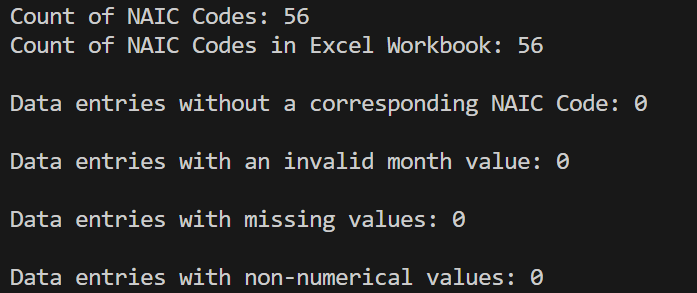



[Back to top](#Index)

## 3. Analysis and Visualization

For each of the sections below, make sure you include a description of the steps you followed. Whenever possible, include screenshots of your code or program windows to demonstrate your steps.

Here, describe the differences, advantages, and disadvantages of running *queries* against your dataset using the MySQL Workbench or a Python environment.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

Describe which *queries* you ran against the MRTS dataset in MySQL Workbench to verify that everything worked as expected.

[Back to top](#Index)

### 3.2 Running Queries From Python

Describe how you tested the previous *queries* on the the MRTS dataset using a Python script and the Terminal window. 

[Back to top](#Index)

### 3.3 Explore Trends

Describe which *queries* you wrote the explore the differences in trends between various categories in your data.

In your submission make sure to answer the following:

- What is an economic trend and why is it considered an important measure to predict quantities, like spending patterns?
- What is the trend of the retail and food services categories? Can this data be displayed clearly or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend?
- When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, what is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly? 

[Back to top](#Index)

### 3.4 Explore Percentage Change

Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission make sure to answer the following:

- In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?
- Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows


Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission, make sure to answer the following:

- In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?
- Consider at least two businesses of your own from the MRTS data. Which *queries* did you write to analyze and produce graphs of rolling time windows for the chosen categories?

[Back to top](#Index)

## Conclusion

Describe your conclusions. Which one of the businesses considered seems like it's going to attract the least spending? Which business seems likely to attract the most spending? 





[Back to top](#Index
)
## References

[1] U.S. Census Bureau, "Monthly Retail Trade", https://www.census.gov/retail/index.html
